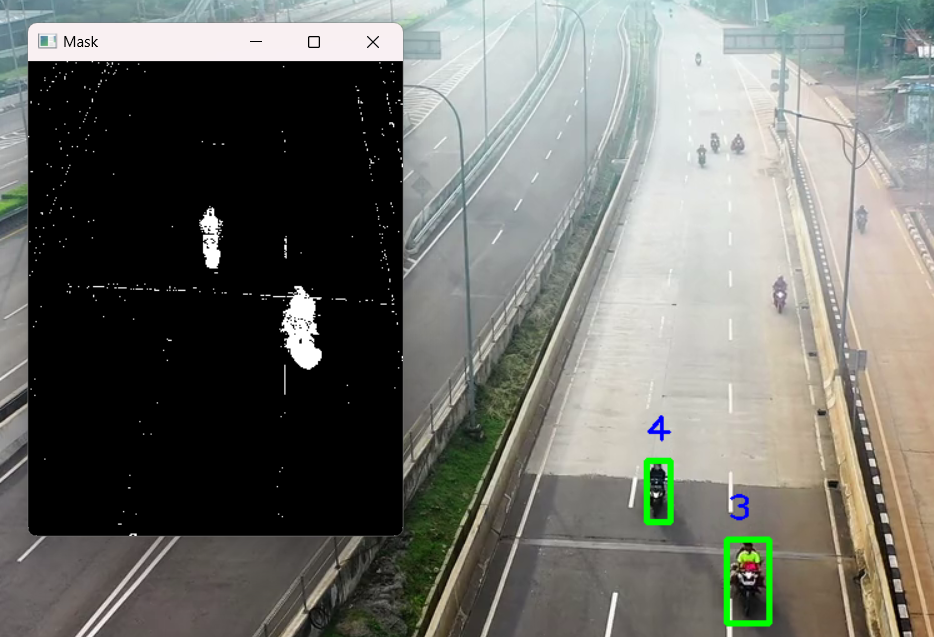

In [ ]:
import cv2
from tracker import *

# Create tracker object
tracker = EuclideanDistTracker()

cap = cv2.VideoCapture(r"D:\avinash\FULL STACK DATA SCIENCE\April\25th-Object_tracking\11. Object tracking\object_tracking\highway.mp4")

# Object detection from Stable camera
object_detector = cv2.createBackgroundSubtractorMOG2(history=100, varThreshold=40)

while True:
    ret, frame = cap.read()
    height, width, _ = frame.shape

    # Extract Region of interest
    roi = frame[340: 720,500: 800]

    # 1. Object Detection
    mask = object_detector.apply(roi)
    _, mask = cv2.threshold(mask, 254, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    detections = []
    for cnt in contours:
        # Calculate area and remove small elements
        area = cv2.contourArea(cnt)
        if area > 100:
            #cv2.drawContours(roi, [cnt], -1, (0, 255, 0), 2)
            x, y, w, h = cv2.boundingRect(cnt)


            detections.append([x, y, w, h])

    # 2. Object Tracking
    boxes_ids = tracker.update(detections)
    for box_id in boxes_ids:
        x, y, w, h, id = box_id
        cv2.putText(roi, str(id), (x, y - 15), cv2.FONT_HERSHEY_PLAIN, 2, (255, 0, 0), 2)
        cv2.rectangle(roi, (x, y), (x + w, y + h), (0, 255, 0), 3)

    cv2.imshow("roi", roi)
    cv2.imshow("Frame", frame)
    cv2.imshow("Mask", mask)

    key = cv2.waitKey(30)
    if key == 27:
        break

cap.release()
cv2.destroyAllWindows()